In [28]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

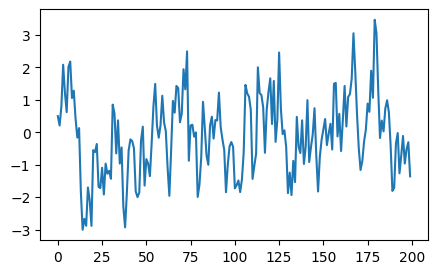

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -268.801
Date:                Mon, 29 Sep 2025   AIC                            543.602
Time:                        05:00:41   BIC                            553.497
Sample:                             0   HQIC                           547.606
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1257      0.187     -0.670      0.503      -0.493       0.242
ar.L1          0.6478      0.056     11.570      0.000       0.538       0.757
sigma2         0.8585      0.086      9.974      0.0

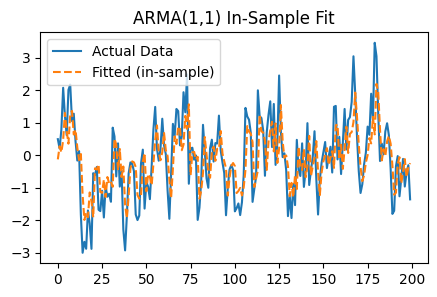

In [29]:
# AR impl: X_t = 0.7 * X_{t-1} + e_t
# AR(lag) poly: X_t + (-0.7) * X_{t-1} = e_t  -> [1,-0.7]
ar=np.array([1,-0.7])
# no MA term
ma=np.array([1])
ar_object=ArmaProcess(ar,ma)

# simulate data
np.random.seed(42)
ar_data=ar_object.generate_sample(nsample=200)

plt.figure(figsize=(5,3))
plt.plot(ar_data)
plt.show()

model_ar=ARIMA(ar_data,order=(1,0,0))
model_ar_fit=model_ar.fit()
print(model_ar_fit.summary())

# In-sample fitted values
fitted_values=model_ar_fit.fittedvalues

plt.figure(figsize=(5,3))
plt.plot(ar_data, label="Actual Data")
plt.plot(fitted_values, label="Fitted (in-sample)", linestyle="--")
plt.legend()
plt.title("ARMA(1,1) In-Sample Fit")
plt.show()


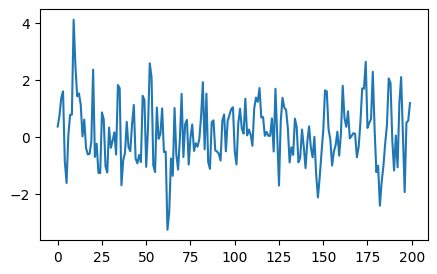

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -280.570
Date:                Mon, 29 Sep 2025   AIC                            567.140
Time:                        05:00:45   BIC                            577.035
Sample:                             0   HQIC                           571.144
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1283      0.102      1.257      0.209      -0.072       0.328
ma.L1          0.4559      0.062      7.304      0.000       0.334       0.578
sigma2         0.9672      0.083     11.599      0.0

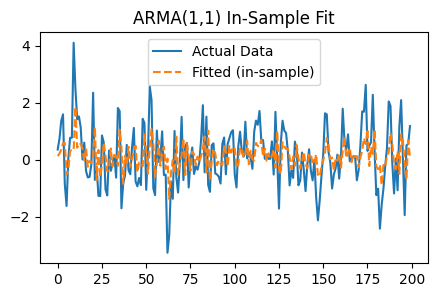

In [30]:
# MA impl: X_t = e_t + 0.5 * e_{t-1}
# lag polynomial: same as above
# no ar term
ar=np.array([1])
ma=np.array([1,0.5])
ma_object=ArmaProcess(ar,ma)

# simulate data
ma_data=ma_object.generate_sample(nsample=200)

plt.figure(figsize=(5,3))
plt.plot(ma_data)
plt.show()

model_ma=ARIMA(ma_data,order=(0,0,1))
model_ma_fit=model_ma.fit()
print(model_ma_fit.summary())

# In-sample fitted values
fitted_values=model_ma_fit.fittedvalues

plt.figure(figsize=(5,3))
plt.plot(ma_data, label="Actual Data")
plt.plot(fitted_values, label="Fitted (in-sample)", linestyle="--")
plt.legend()
plt.title("ARMA(1,1) In-Sample Fit")
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -274.138
Date:                Mon, 29 Sep 2025   AIC                            556.275
Time:                        05:21:40   BIC                            569.469
Sample:                             0   HQIC                           561.614
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4519      0.252      1.791      0.073      -0.043       0.946
ar.L1          0.6181      0.071      8.698      0.000       0.479       0.757
ma.L1          0.4236      0.075      5.635      0.0

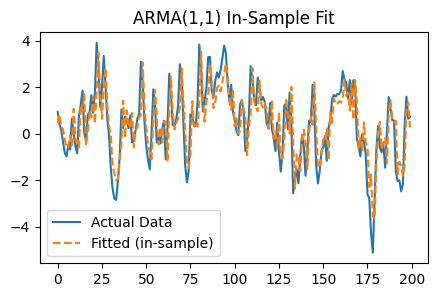

In [39]:
# ARMA process impl: X_t = 0.6 * X_{t-1} + e_t + 0.4 * e_{t-1}
ar=np.array([1,-0.6])
ma=np.array([1,0.4])
arma_object=ArmaProcess(ar,ma)

arma_data=arma_object.generate_sample(nsample=200)

model_arma=ARIMA(arma_data,order=(1,0,1))
model_arma_fit=model_arma.fit()
print(model_arma_fit.summary())

# In-sample fitted values
# In-sample fitted values
fitted_values=model_arma_fit.fittedvalues

plt.figure(figsize=(5,3))
plt.plot(arma_data, label="Actual Data")
plt.plot(fitted_values, label="Fitted (in-sample)", linestyle="--")
plt.legend()
plt.title("ARMA(1,1) In-Sample Fit")
plt.show()

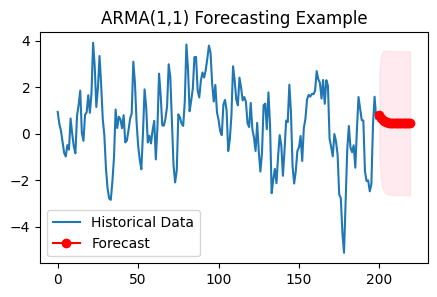

In [41]:
# we can see from above that the ARMA model which is a combination of ar and ma give pretty accurate answers.
# now we concentrate on forecasting future values

forecast_object=model_arma_fit.get_forecast(steps=20)

# mean predictions
forecast_mean=forecast_object.predicted_mean

# confidence intervals (95%)
forecast_ci=forecast_object.conf_int()

plt.figure(figsize=(5,3))

# Plot actual historical data
plt.plot(arma_data, label="Historical Data")

# Plot forecasted mean
plt.plot(range(len(arma_data), len(arma_data)+20), forecast_mean,
         color="red", marker="o", label="Forecast")

# Plot confidence intervals (shaded area)
plt.fill_between(range(len(arma_data), len(arma_data)+20),
                 forecast_ci[:,0],
                 forecast_ci[:,1], color="pink", alpha=0.3)

plt.legend()
plt.title("ARMA(1,1) Forecasting Example")
plt.show()